# AFFAIRS DATASET
Using the above dataset to build a Model using Logistic Regression model to predict whether the person will have an affair or not.  

## BUSINESS OBJECTIVE
* Maximize accurate prediction
* Minimize affairs

## CONSTRAINTS
* Human Behaviour

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 0 | Unnamed: 0   | Column of Index numbers          | Count     | Relevant      |
| 1 | naffairs     | Number of Extramarital affairs   | Count     | Relevant      |
| 2 | kids         | Number of Kids: Yes/No           | Binary    | Relevant      |
| 3 | vryunhap     | Very unhappy marriage: Yes/No    | Binary    | Relevant      |
| 4 | unhap        | Unhappy marriage: Yes/No         | Binary    | Relevant      |
| 5 | avgmarr      | Average Marriage: Yes/No         | Binary    | Relevant      |
| 6 | hapavg       | Average Happy Marriage: Yes/No   | Binary    | Relevant      |
| 7 | vryhap       | Very Happy Marriage: Yes/No      | Binary    | Relevant      |
| 8 | antirel      | Anti-Religious: Yes/No           | Binary    | Relevant      |
| 9 | notrel       | Not Religious: Yes/No            | Binary    | Relevant      |
| 10 | slghtrel    | Slightly Religious: Yes/No       | Binary    | Relevant      |
| 11 | smerel      | Slightly more Religious: Yes/No  | Binary    | Relevant      |
| 12 | vryrel      | Very Religious: Yes/No           | Binary    | Relevant      |
| 13 | yrsmarr1    | One Year of Marriage: Yes/No     | Binary    | Relevant      |
| 14 | yrsmarr2    | Two Years of Marriage            | Binary    | Relevant      |
| 15 | yrsmarr3    | Three Years of Marriage          | Binary    | Relevant      |
| 16 | yrsmarr4    | Four Years of Marriage           | Binary    | Relevant      |
| 17 | yrsmarr5    | Five Years of Marriage           | Binary    | Relevant      |
| 18 | yrsmarr6    | Six Years of Marriage            | Binary    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass23\Affairs.csv")
df=df0.copy()
df.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [3]:
df.columns

Index(['Unnamed: 0', 'naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr',
       'hapavg', 'vryhap', 'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel',
       'yrsmarr1', 'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [5]:
df.shape

(601, 18)

In [6]:
df.dtypes

naffairs    int64
kids        int64
vryunhap    int64
unhap       int64
avgmarr     int64
hapavg      int64
vryhap      int64
antirel     int64
notrel      int64
slghtrel    int64
smerel      int64
vryrel      int64
yrsmarr1    int64
yrsmarr2    int64
yrsmarr3    int64
yrsmarr4    int64
yrsmarr5    int64
yrsmarr6    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   naffairs  601 non-null    int64
 1   kids      601 non-null    int64
 2   vryunhap  601 non-null    int64
 3   unhap     601 non-null    int64
 4   avgmarr   601 non-null    int64
 5   hapavg    601 non-null    int64
 6   vryhap    601 non-null    int64
 7   antirel   601 non-null    int64
 8   notrel    601 non-null    int64
 9   slghtrel  601 non-null    int64
 10  smerel    601 non-null    int64
 11  vryrel    601 non-null    int64
 12  yrsmarr1  601 non-null    int64
 13  yrsmarr2  601 non-null    int64
 14  yrsmarr3  601 non-null    int64
 15  yrsmarr4  601 non-null    int64
 16  yrsmarr5  601 non-null    int64
 17  yrsmarr6  601 non-null    int64
dtypes: int64(18)
memory usage: 84.6 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [8]:
df.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [9]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  336


Although there are 336 duplicate values, as the data is mostly in binaries the chances of multiple records having the same values is possible so keeping them as removing them will remove most of the records from the dataset.

Checking the Number and Percentage of Missing Values in the Dataset.

In [10]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 naffairs    0
kids        0
yrsmarr5    0
yrsmarr4    0
yrsmarr3    0
yrsmarr2    0
yrsmarr1    0
vryrel      0
smerel      0
slghtrel    0
notrel      0
antirel     0
vryhap      0
hapavg      0
avgmarr     0
unhap       0
vryunhap    0
yrsmarr6    0
dtype: int64


In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 naffairs    6
kids        2
vryunhap    2
unhap       2
avgmarr     2
hapavg      2
vryhap      2
antirel     2
notrel      2
slghtrel    2
smerel      2
vryrel      2
yrsmarr1    2
yrsmarr2    2
yrsmarr3    2
yrsmarr4    2
yrsmarr5    2
yrsmarr6    2
dtype: int64


In [12]:
df['affairsyn'] =np.where(df.naffairs > 0, 1, 0)
df.drop(['naffairs'],axis=1,inplace=True)
df.head()

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairsyn
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [13]:
df.mean()

kids         0.715474
vryunhap     0.026622
unhap        0.109817
avgmarr      0.154742
hapavg       0.322795
vryhap       0.386023
antirel      0.079867
notrel       0.272879
slghtrel     0.214642
smerel       0.316140
vryrel       0.116473
yrsmarr1     0.086522
yrsmarr2     0.146423
yrsmarr3     0.174709
yrsmarr4     0.136439
yrsmarr5     0.116473
yrsmarr6     0.339434
affairsyn    0.249584
dtype: float64

In [14]:
df.median()

kids         1.0
vryunhap     0.0
unhap        0.0
avgmarr      0.0
hapavg       0.0
vryhap       0.0
antirel      0.0
notrel       0.0
slghtrel     0.0
smerel       0.0
vryrel       0.0
yrsmarr1     0.0
yrsmarr2     0.0
yrsmarr3     0.0
yrsmarr4     0.0
yrsmarr5     0.0
yrsmarr6     0.0
affairsyn    0.0
dtype: float64

In [15]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_30604\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64), count=array([[430, 585, 535, 508, 407, 369, 553, 437, 472, 411, 531, 549, 513,
        496, 519, 531, 397, 451]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [16]:
df.var()

kids         0.203910
vryunhap     0.025957
unhap        0.097920
avgmarr      0.131015
hapavg       0.218963
vryhap       0.237404
antirel      0.073611
notrel       0.198747
slghtrel     0.168852
smerel       0.216556
vryrel       0.103078
yrsmarr1     0.079168
yrsmarr2     0.125191
yrsmarr3     0.144426
yrsmarr4     0.118020
yrsmarr5     0.103078
yrsmarr6     0.224592
affairsyn    0.187604
dtype: float64

In [17]:
df.std()

kids         0.451564
vryunhap     0.161111
unhap        0.312922
avgmarr      0.361960
hapavg       0.467935
vryhap       0.487242
antirel      0.271313
notrel       0.445810
slghtrel     0.410916
smerel       0.465355
vryrel       0.321058
yrsmarr1     0.281368
yrsmarr2     0.353824
yrsmarr3     0.380034
yrsmarr4     0.343540
yrsmarr5     0.321058
yrsmarr6     0.473912
affairsyn    0.433133
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [18]:
df.skew()

kids        -0.957532
vryunhap     5.896039
unhap        2.502131
avgmarr      1.914083
hapavg       0.759919
vryhap       0.469407
antirel      3.107379
notrel       1.022318
slghtrel     1.393524
smerel       0.792831
vryrel       2.397125
yrsmarr1     2.948863
yrsmarr2     2.005280
yrsmarr3     1.717621
yrsmarr4     2.123620
yrsmarr5     2.397125
yrsmarr6     0.679881
affairsyn    1.160162
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [19]:
df.kurt()

kids         -1.086759
vryunhap     32.872664
unhap         4.274874
avgmarr       1.669258
hapavg       -1.427283
vryhap       -1.785610
antirel       7.681355
notrel       -0.958065
slghtrel     -0.058297
smerel       -1.376009
vryrel        3.758705
yrsmarr1      6.718138
yrsmarr2      2.027884
yrsmarr3      0.953383
yrsmarr4      2.518132
yrsmarr5      3.758705
yrsmarr6     -1.542907
affairsyn    -0.656219
dtype: float64

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables as all the variables are binary, so using scatterplots and boxplots is not an option. 

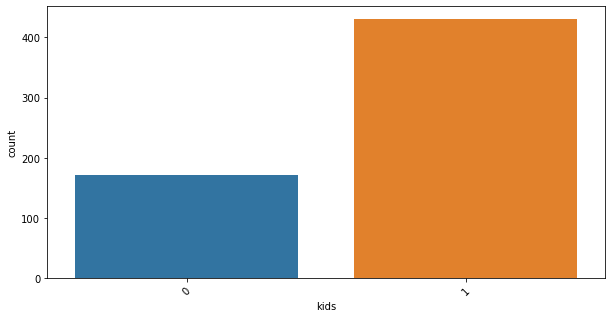

In [20]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["kids"])
plt.xticks(rotation = 45)
plt.show()

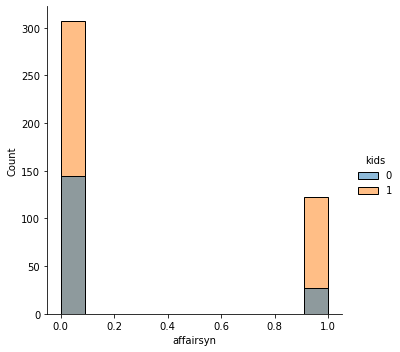

In [21]:
sns.displot(df, x="affairsyn", hue="kids")

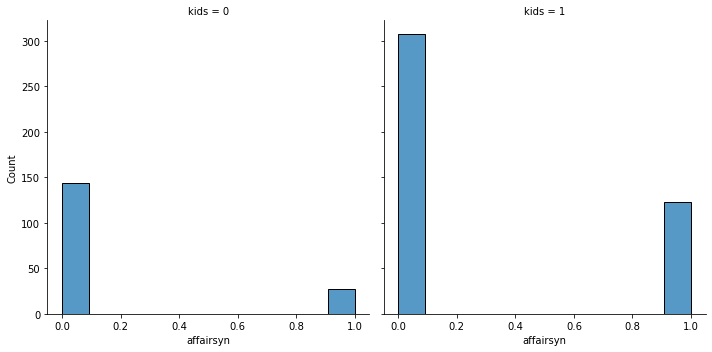

In [22]:
sns.displot(df, x="affairsyn", col="kids")

In [23]:
df.columns

Index(['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6', 'affairsyn'],
      dtype='object')

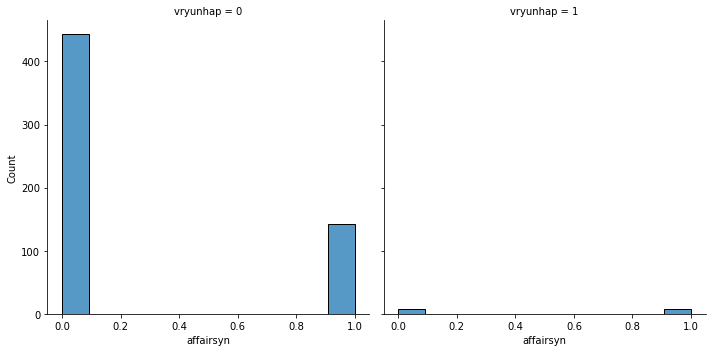

In [24]:
sns.displot(df,x='affairsyn',col='vryunhap')

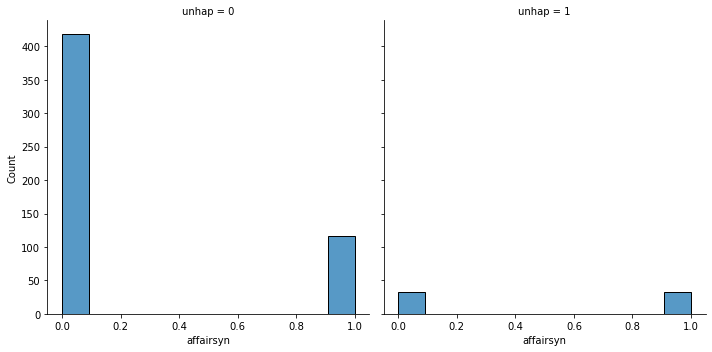

In [25]:
sns.displot(df,x='affairsyn',col='unhap')

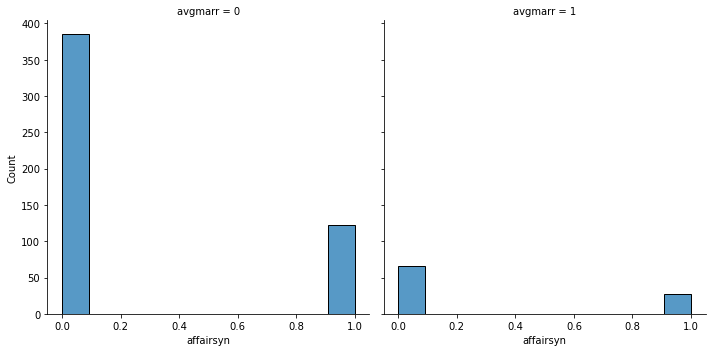

In [26]:
sns.displot(df,x='affairsyn',col='avgmarr')

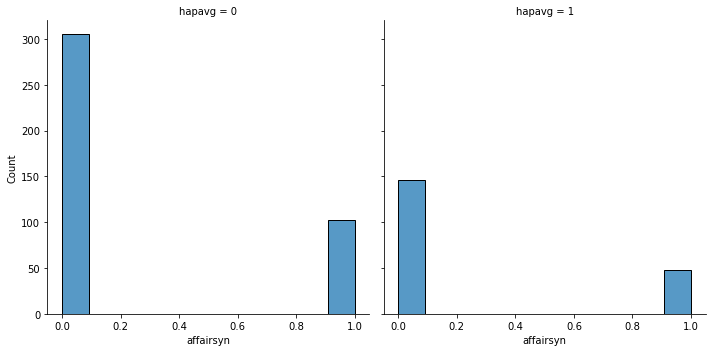

In [27]:
sns.displot(df,x='affairsyn',col='hapavg')

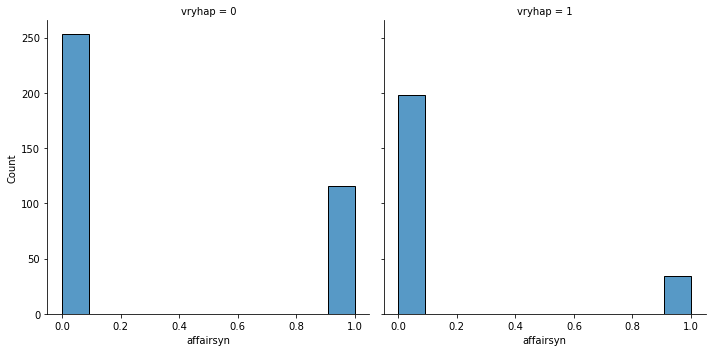

In [28]:
sns.displot(df,x='affairsyn',col='vryhap')

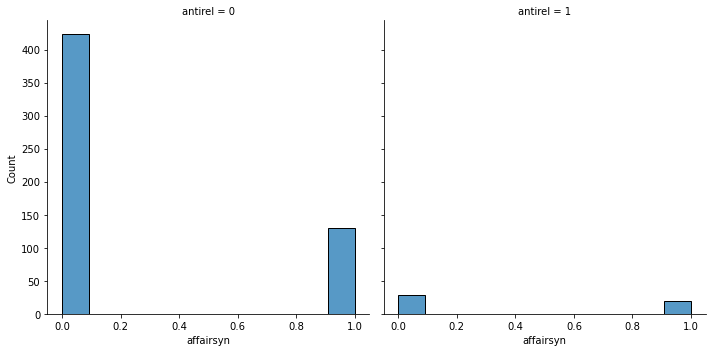

In [29]:
sns.displot(df,x='affairsyn',col='antirel')

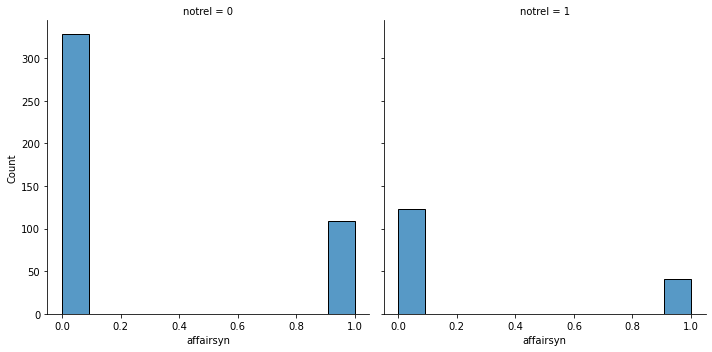

In [30]:
sns.displot(df,x='affairsyn',col='notrel')

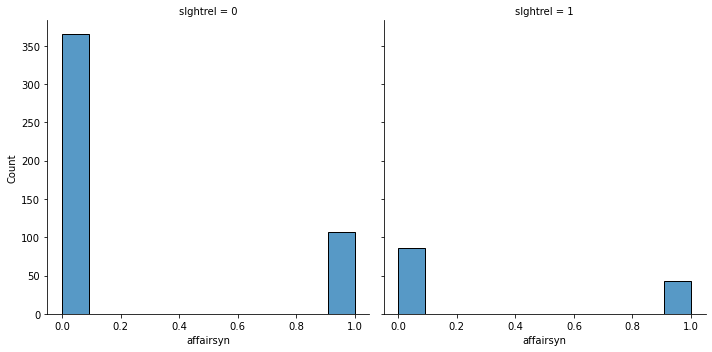

In [31]:
sns.displot(df,x='affairsyn',col='slghtrel')

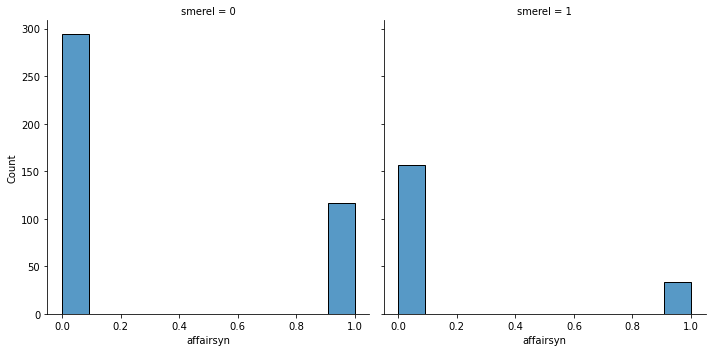

In [32]:
sns.displot(df,x='affairsyn',col='smerel')

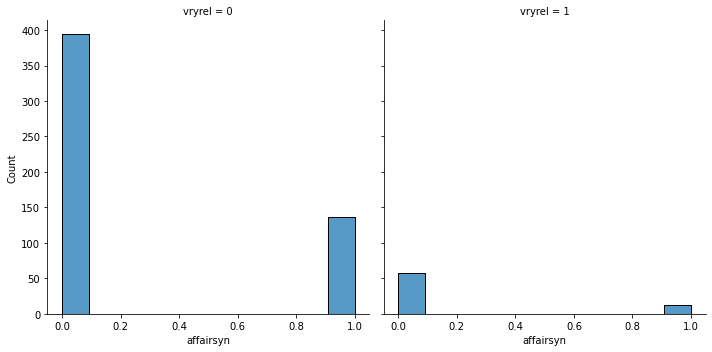

In [33]:
sns.displot(df,x='affairsyn',col='vryrel')

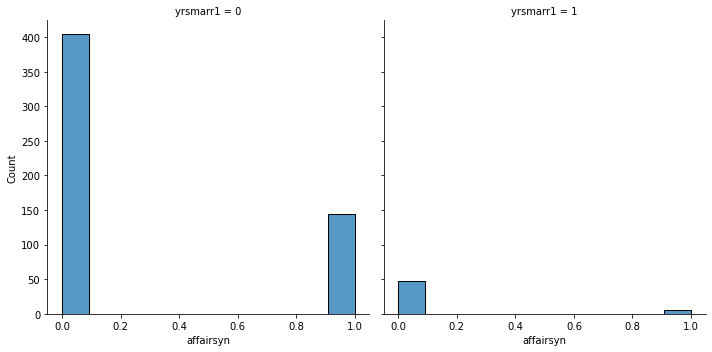

In [34]:
sns.displot(df,x='affairsyn',col='yrsmarr1')

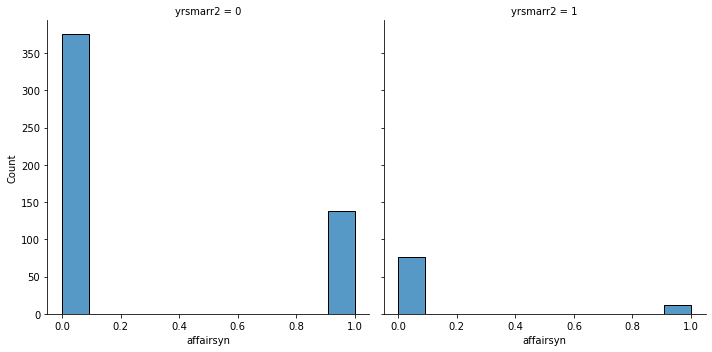

In [35]:
sns.displot(df,x='affairsyn',col='yrsmarr2')

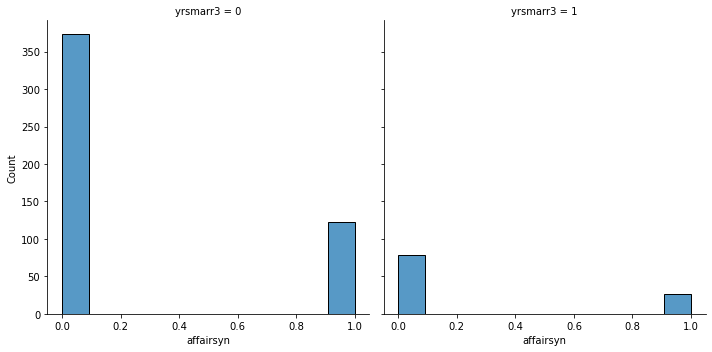

In [36]:
sns.displot(df,x='affairsyn',col='yrsmarr3')

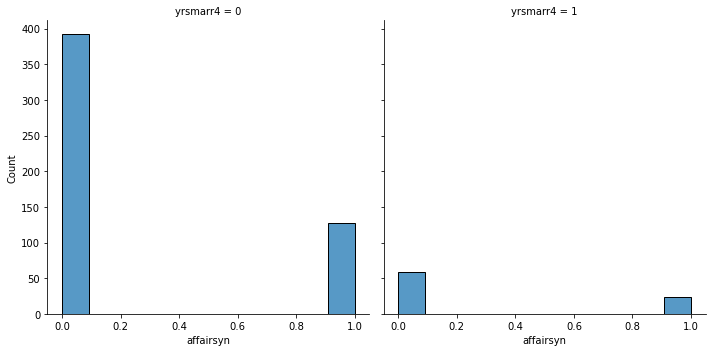

In [37]:
sns.displot(df,x='affairsyn',col='yrsmarr4')

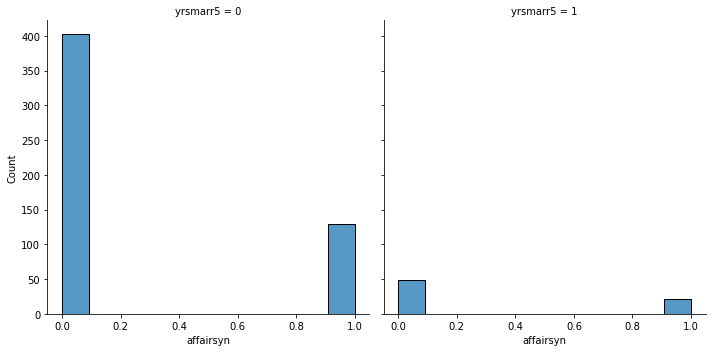

In [38]:
sns.displot(df,x='affairsyn',col='yrsmarr5')

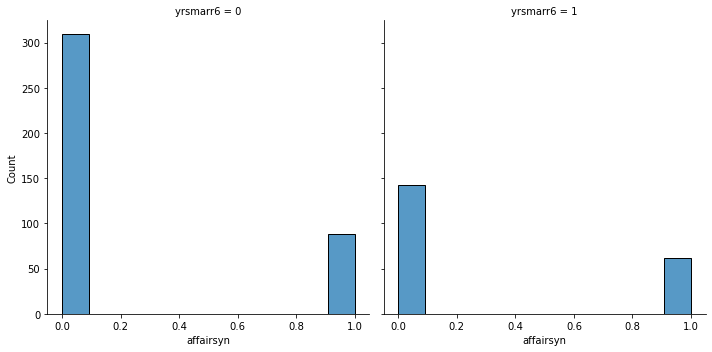

In [39]:
sns.displot(df,x='affairsyn',col='yrsmarr6')

* From the above plots we can see that people with kids have more chances of having an affair 
* The chances of an affair also increases with higher years of marriage. 
* Happy and very happy people also have higher chance of having an affair. 
* Not religious and slightly religious people also have higher chance of having an affair comparatively. 

__CORRELATION CHART__

<AxesSubplot:>

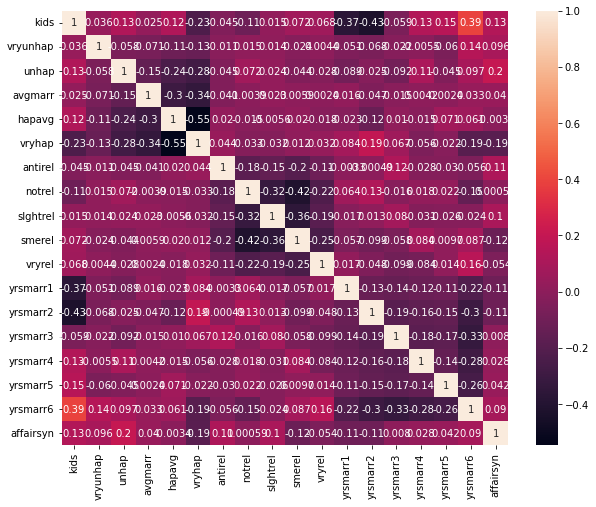

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that no variable has a very strong relation with the output variable

#### MODEL BUILDING

Importing the library required for building the model. 

In [41]:
import statsmodels.formula.api as smf

__Logistic Regression__

Fitting the model

In [42]:
logit_model = smf.logit('affairsyn ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 6


For getting the value of AIC we use the summary2

In [43]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.108     
Dependent Variable:    affairsyn           AIC:                 632.2126  
Date:                  2022-11-22 23:34    BIC:                 698.1915  
No. Observations:      601                 Log-Likelihood:      -301.11   
Df Model:              14                  LL-Null:             -337.69   
Df Residuals:          586                 LLR p-value:         5.1293e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.6174          nan     nan    nan            nan           nan
kids       0.1727       0.3110  0.5555 0.5785        -0.4367        0.7822
vryunhap   0.5130 6583635.1142  0.0000 1.0000 -12903687.1982 12903688.2243
unhap      0.6187 6583635.1142  0.0000 1.0000 -12903687.0926 12903688.3299
avgmarr   -0.2178 6583635.1142 -0.0000 1.0000 -12903687.9291 12903687.4934
hapavg    -0.5264 6583635.1142 -0.0000 1.0000 -12903688.2377 12903687.1849
vryhap    -1.0049 6583635.1142 -0.0000 1.0000 -12903688.7162 12903686.7064
antirel    0.7815 4005951.2501  0.0000 1.0000  -7851519.3926  7851520.9556
notrel    -0.2052 4005951.2501 -0.0000 1.0000  -7851520.3793  7851519.9689
slghtrel   0.1848 4005951.2501  0.0000 1.0000  -7851519.9893  7851520.3589
smerel    -0.7377 4005951.2501 -0.0000 1.0000  -7851520.9118  7851519.4364
vryrel    -0.6408 4005951.2501 -0.0000 1.0000  -7851520.8149  7851519.5333
yrsmarr1  -0.8579 6925205.0692 -0.0000 1.0000 -13573153.3791 13573151.6632
yrsmarr2  -0.5608 6925205.0692 -0.0000 1.0000 -13573153.0819 13573151.9603
yrsmarr3   0.0635 6925205.0692  0.0000 1.0000 -13573152.4576 13573152.5846
yrsmarr4   0.0891 6925205.0692  0.0000 1.0000 -13573152.4320 13573152.6102
yrsmarr5   0.4088 6925205.0692  0.0000 1.0000 -13573152.1123 13573152.9299
yrsmarr6   0.2399 6925205.0692  0.0000 1.0000 -13573152.2812 13573152.7610
==========================================================================

"""

In [44]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              affairsyn   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.1083
Time:                        23:34:38   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6174        nan        nan        nan         nan         nan
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.5130   6.58e+06   7.79e-08      1.000   -1.29e+07    1.29e+07
unhap          0.6187   6.58e+06    9.4e-08      1.000   -1.29e+07    1.29e+07
avgmarr       -0.2178   6.58e+06  -3.31e-08      1.000   -1.29e+07    1.29e+07
hapavg        -0.5264   6.58e+06     -8e-08      1.000   -1.29e+07    1.29e+07
vryhap        -1.0049   6.58e+06  -1.53e-07      1.000   -1.29e+07    1.29e+07
antirel        0.7815   4.01e+06   1.95e-07      1.000   -7.85e+06    7.85e+06
notrel        -0.2052   4.01e+06  -5.12e-08      1.000   -7.85e+06    7.85e+06
slghtrel       0.1848   4.01e+06   4.61e-08      1.000   -7.85e+06    7.85e+06
smerel        -0.7377   4.01e+06  -1.84e-07      1.000   -7.85e+06    7.85e+06
vryrel        -0.6408   4.01e+06   -1.6e-07      1.000   -7.85e+06    7.85e+06
yrsmarr1      -0.8579   6.93e+06  -1.24e-07      1.000   -1.36e+07    1.36e+07
yrsmarr2      -0.5608   6.93e+06   -8.1e-08      1.000   -1.36e+07    1.36e+07
yrsmarr3       0.0635   6.93e+06   9.17e-09      1.000   -1.36e+07    1.36e+07
yrsmarr4       0.0891   6.93e+06   1.29e-08      1.000   -1.36e+07    1.36e+07
yrsmarr5       0.4088   6.93e+06    5.9e-08      1.000   -1.36e+07    1.36e+07
yrsmarr6       0.2399   6.93e+06   3.46e-08      1.000   -1.36e+07    1.36e+07
==============================================================================
"""

From the summary we can see that the probability have very high values but since the variables are binary we can ignore the probabilities. from summary2 we consider the AIC value which we can use to compare the models and decide which is better. 

Loading the libraries required for getting the accuracy scores of the model. 

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

Predicting the values using the model. 

In [46]:
pred = logit_model.predict(df.iloc[ :, 0:17 ])

From the sklearn library using roc_curve to find the fpr, tpr and thresholds to find the optimal threshold. 

In [47]:
# from sklearn import metrics
fpr, tpr, thresholds = roc_curve(df.affairsyn, pred)
# Using the argmax to find the index which has the highest difference between the True Positive Rate and False Positive Rate. 
optimal_idx = np.argmax(tpr - fpr)
# Identifying the optimal threshold and saving it using the index value. 
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.252157157013533

Importing the library required to create the ROC curve. 

In [48]:
import pylab as pl

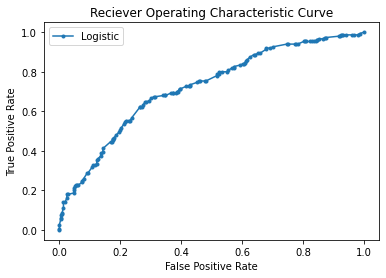

In [49]:
pl.plot(fpr,tpr, marker='.', label='Logistic');pl.xlabel('False Positive Rate');pl.ylabel('True Positive Rate');pl.title('Reciever Operating Characteristic Curve')
pl.legend()
pl.show()

Using the auc function to get the Area under the ROC Curve. 

In [50]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.720880


Getting the classification report after setting the optimal threshold value as the cutoff value and converting the predicted probabilities into the binary output. 

In [51]:
# filling all the cells with zeroes
df["pred"] = np.zeros(601)
# taking threshold value and above the prob value will be treated as correct value 
df.loc[pred > optimal_threshold, "pred"] = 1
# classification report
print(classification_report(y_pred=df["pred"], y_true=df["affairsyn"]))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77       451
           1       0.42      0.65      0.51       150

    accuracy                           0.69       601
   macro avg       0.64      0.68      0.64       601
weighted avg       0.75      0.69      0.71       601



Saving the classification report in a dataframe.

In [52]:
classification_report = pd.DataFrame(classification_report(y_pred =df["pred"], y_true =df["affairsyn"], output_dict=True)).transpose()
classification_report

,precision,recall,f1-score,support
0,0.859459,0.705100,0.774665,451.00000
1,0.424242,0.653333,0.514436,150.00000
accuracy,0.692180,0.692180,0.692180,0.69218
macro avg,0.641851,0.679217,0.644550,601.00000
weighted avg,0.750836,0.692180,0.709716,601.00000


Using the train test split function to split the data into train and test dataset. 

In [53]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state=1000) # 30% test data

Fitting the model on the training data. 

In [54]:
model = smf.logit('affairsyn ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6', data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.505952
         Iterations 17


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              affairsyn   No. Observations:                  420
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.1044
Time:                        23:34:47   Log-Likelihood:                -212.50
converged:                       True   LL-Null:                       -237.27
Covariance Type:            nonrobust   LLR p-value:                 7.271e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5268   3.63e+06  -1.45e-07      1.000   -7.12e+06    7.12e+06
kids           0.0839      0.365      0.230      0.818      -0.631       0.799
vryunhap       0.5494        nan        nan        nan         nan         nan
unhap          0.5107        nan        nan        nan         nan         nan
avgmarr        0.1462        nan        nan        nan         nan         nan
hapavg        -0.6532        nan        nan        nan         nan         nan
vryhap        -1.0798        nan        nan        nan         nan         nan
antirel        0.7802        nan        nan        nan         nan         nan
notrel        -0.2567        nan        nan        nan         nan         nan
slghtrel       0.1001        nan        nan        nan         nan         nan
smerel        -0.6538        nan        nan        nan         nan         nan
vryrel        -0.4964        nan        nan        nan         nan         nan
yrsmarr1      -0.8013        nan        nan        nan         nan         nan
yrsmarr2      -0.4798        nan        nan        nan         nan         nan
yrsmarr3       0.0122        nan        nan        nan         nan         nan
yrsmarr4       0.2701        nan        nan        nan         nan         nan
yrsmarr5       0.2852        nan        nan        nan         nan         nan
yrsmarr6       0.1869        nan        nan        nan         nan         nan
==============================================================================
"""

In [56]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.104     
Dependent Variable:    affairsyn          AIC:                454.9995  
Date:                  2022-11-22 23:34   BIC:                515.6033  
No. Observations:      420                Log-Likelihood:     -212.50   
Df Model:              14                 LL-Null:            -237.27   
Df Residuals:          405                LLR p-value:        7.2713e-06
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        17.0000                                          
------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------------
Intercept -0.5268 3632367.4303 -0.0000 1.0000 -7119309.8687 7119308.8151
kids       0.0839       0.3649  0.2299 0.8182       -0.6313       0.7990
vryunhap   0.5494          nan     nan    nan           nan          nan
unhap      0.5107          nan     nan    nan           nan          nan
avgmarr    0.1462          nan     nan    nan           nan          nan
hapavg    -0.6532          nan     nan    nan           nan          nan
vryhap    -1.0798          nan     nan    nan           nan          nan
antirel    0.7802          nan     nan    nan           nan          nan
notrel    -0.2567          nan     nan    nan           nan          nan
slghtrel   0.1001          nan     nan    nan           nan          nan
smerel    -0.6538          nan     nan    nan           nan          nan
vryrel    -0.4964          nan     nan    nan           nan          nan
yrsmarr1  -0.8013          nan     nan    nan           nan          nan
yrsmarr2  -0.4798          nan     nan    nan           nan          nan
yrsmarr3   0.0122          nan     nan    nan           nan          nan
yrsmarr4   0.2701          nan     nan    nan           nan          nan
yrsmarr5   0.2852          nan     nan    nan           nan          nan
yrsmarr6   0.1869          nan     nan    nan           nan          nan
========================================================================

"""

From the summary we can see that the AIC value is lower while fitting the model on the train data. Predicting the probabilities on the test data

In [57]:
test_pred=model.predict(df_test)

In [58]:
# Creating new column for storing predicted data after binarisation. 
# filling all the cells with zeroes
df_test["test_pred"] = np.zeros(181)

In [59]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
df_test.loc[test_pred > optimal_threshold, "test_pred"] = 1

Using the crosstab function from the pandas library to create the Confusion Matrix. 

In [60]:
confusion_matrix = pd.crosstab(df_test['test_pred'], df_test['affairsyn'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,94,19
1.0,43,25


Calculating the acuracy of the test data by adding the correctly predicted records and dividing it by the total number of records. 

In [61]:
accuracy_test = (94 + 25)/(181) 
accuracy_test

0.6574585635359116

Following the same steps to calculate the accuracy of the train data. 

In [62]:
train_pred=model.predict(df_train)

In [63]:
df_train["train_pred"]=np.zeros(420)

In [64]:
df_train.loc[train_pred>optimal_threshold,'train_pred']=1

In [65]:
confusion_matrix = pd.crosstab(df_train['train_pred'], df_train['affairsyn'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,214,39
1.0,100,67


In [66]:
accuracy_train = (214+ 39)/(420) 
accuracy_train

0.6023809523809524

### CONCLUSION

From the accuracies of both the train and test data we can see although the accuracies are not overfitting or underfitting, but the model accuracy is not great. So this model wouldn't be ideal to predict the affairs dataset. 